<h5>es01-1: test random number generator, i.e. determine whether its mean value is 0.5 and its $\sigma$ is $\frac{1}{12}$, as expected for a uniformly distributed random variable between 0 and 1 <h5>

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, rExpValue, rUncert = np.loadtxt("exercices/output/dir01-1/01-1a", 
                                        usecols = (0,1,2), delimiter = ' ', unpack = 'true')

x, sigmaExpValue, sigmaUncert = np.loadtxt("exercices/output/dir01-1/01-1a", 
                                        usecols = (0,3,4), delimiter = ' ', unpack = 'true')




In order to test the randomness of the generator, we need to compute both its moments and the statistical uncertainty about the values we obtain. In order to do this, we should be able to compute means of indipendent samples. This is achieved by first computing the mean out of N consecutive values a time (a "block mean"), and then using these means as indipendent samples from the probability distribution. The formula for computing the statistical error is then:
$\sigma_{stat} = \sqrt{\frac {1}{N-1}}\bullet \sqrt{ \frac {\sum_{i=1}^{N}{{A_i}^2}}{N} - \left(\frac{\sum_{i=1}^{N}{A_i}}{N}\right)^2 }  $
where $A_i$ is the mean of the i-th block. 
For the present computation, values of N = 100, and 100 samples per block have been used.

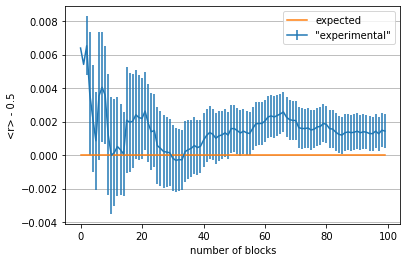

In [6]:
plt.errorbar(x, rExpValue, yerr=rUncert, label="\"experimental\"")
plt.plot (x, np.zeros(x.shape), label="expected")
plt.xlabel ('number of blocks')
plt.ylabel  ('<r> - 0.5')
plt.grid (True, axis='y')
plt.legend()
plt.show()

 The continuous blue line rappresents the difference between the mean value $<r>$ and the expected first moment $\frac{1}{2}$. The yellow line rappresents the expected value of the above difference, which is 0. It can be seen that data match with expectation within 2 times the statistical error (error bars)  

The graph below shows computation of the standard deviation from the uniform distribution of the RNG. The same approach than the previous one is used, with 100 blocks by 100 samples each.

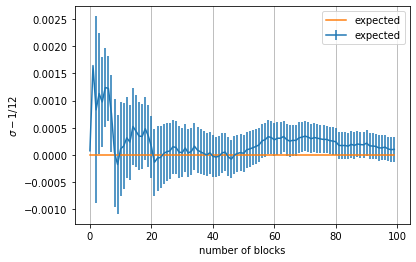

In [7]:
plt.errorbar (x, sigmaExpValue, yerr=sigmaUncert, label="expected")
plt.plot (x, np.zeros (x.shape), label="expected")
plt.xlabel ('number of blocks')
plt.ylabel ('$\sigma - 1/12$')
plt.grid(True, axis='x')
plt.legend()
plt.show()

The same considerations about error bars and expectations for the previuos graph apply to the present case

next we try to figure out how much our RNG distribution is "similar " to an uniform one, by permforming a $\chi^2$ test 
($\chi^2$ formula: $\chi^2 = \sum_{1=1}^{M}{\frac{o_i - e_i}{e_i}}$, $o_i$ = observed, $e_i$ = expected). 
We perform the test separately on each out of N = 1000 blocks. Next we plot the obtained values of $\chi^2$ into an histogram and that is compared to the analytic distribution of the random variable $\chi^2$ for M-1 degrees of freedom


In [8]:
import scipy.stats as spy
data = np.loadtxt("exercices/output/dir01-1/01-1b", 
                 delimiter = ' ', unpack = 'true')


     

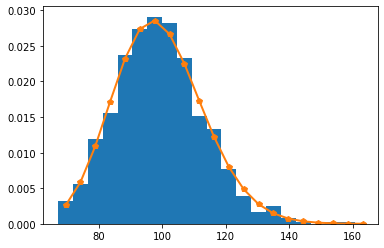

In [9]:
#plot results
nbins = 20
N, Bins, Patches = plt.hist(data, density = 1, bins = nbins)

#comparing "experimental" distribution with chiSquared distribution
freeDeg = 99; #degrees of freedom = 100-1 (100 is number of throws for each block)

x = Bins + (Bins[1]-Bins[0])/2

plt.plot(x, spy.chi2.pdf(x, freeDeg), 'p-', lw = 2)


It can be seen that the obtained distribution quite well resembles that for a $\chi^2$ calculated from random samples from an actual uniform distribution

<h5>es01-2: test Central limit theorem<h5>



The theorem states that the mean of N samples from a probability distribution whathever, provided that it has finite variance, for big N, is a Gaussian distributed variable with the same mean value as the original distribution and variance = \[original variance\]/N. 

In order to experimentally "test" the theorem, we choose 2 different probability distribution: Gaussian with mean 0 and $\sigma =  1$, and exponential with $\lambda = 1$. Then we make histograms showing the distribution obtained from the mean of N = 1, 2, 10, 100 samples from each of the 3. We expect these graphs to become increasingly similar to a Gaussian with increasingly small variance for increasing N.

We also test a counterexample to the theorem: by drawing samples from a Lorentz disttribution, which has non-finite variance, we show that even when increasing N to 100 the graph does not become a Gaussian; indeed, it remains quite the same, since the Lorentz distribution is called an "attractor" for some non-finite variance probability distributions

In [39]:
from scipy.optimize import curve_fit

def Gauss (x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2)/(np.sqrt(2*np.pi)*sigma)
def Lorentz (x, center, Gamma):
    return Gamma / (np.pi * ((x-center)**2 + Gamma**2))

def makehistogram (filename, nbins = 50):
    numCumulate = ['1','2','10','100']
    fig, ax = plt.subplots(1,4, figsize=(15,4))
    
    for ind, element in enumerate(numCumulate):
        data = np.loadtxt ("exercices/output/dir01-2/01-2-" +
                           element + filename, unpack = 'true')

        ax[ind].set_title('distribution of ' + element + ' throws')
        if filename == "Lorentz":
            ax[ind].set_xlim([-100,100])
            ax[ind].set_yscale("log") 
            bins = np.linspace (-100, 100, nbins)
            cols, bins, bars = ax[ind].hist (data, bins = bins, density = 1, label = element)
        else:
            cols, bins, bars = ax[ind].hist (data, bins = nbins, density = 1, label = element)
                   
    centers = (bins + (bins [1] - bins [0])) [:-1]
    if filename=="Lorentz":
        param, _ = curve_fit (Lorentz, centers, cols)
        ax[ind].plot (centers, Lorentz (centers, param[0], param[1]))
    else:
        param, _ = curve_fit (Lorentz, centers, cols)
        ax[ind].plot (centers, Gauss (centers, param[0], param[1]))
        print ("paramteters: mu = {}, sigma = {}".format(param[0], param[1]))
    
    
    
    
    


paramteters: mu = 1.0000754625539348, sigma = 0.07639190566383389


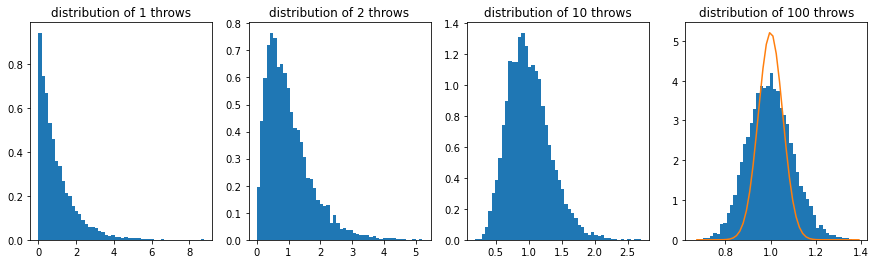

In [40]:
#exponential convergence
name = "Exp"

makehistogram (filename = name)

paramteters: mu = 0.010800023295916799, sigma = 0.07649608283517284


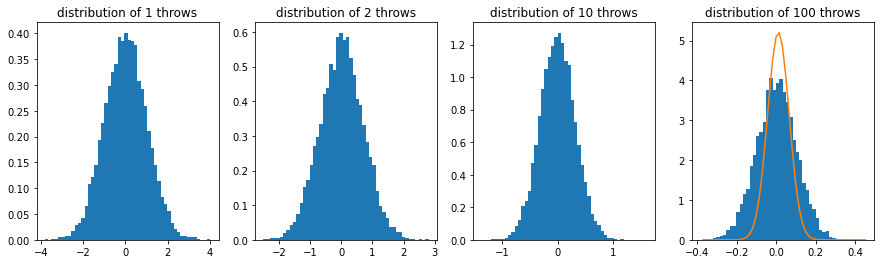

In [41]:
name = "Gauss"

makehistogram(name) 

below: Lorentz distrribution. Axis y is logscale. A feature encountered during analysis that cannot be inferred from the plots is that no matter how big the number of averaged samples is, there always are 

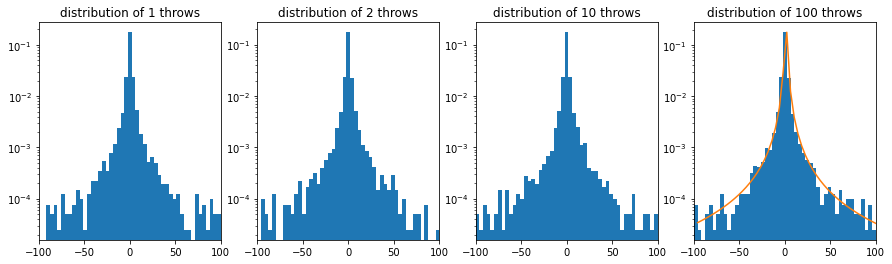

In [30]:
name = "Lorentz"

makehistogram (name)

The Central Limit theorem seems to hold, even though the fit is better for the Lorentz distribution rather than the Gaussian. It may well be that either the number of averaged throws is too small or that the parameters for the fit have not been chosen well. 

<h5> es01-3: Buffon experiment<h5> 

Buffon experiment consists in repeatedly throwing a needle on the floor. Straight parallel lines are drawn on the floor, and the probability for the needle inersecting one of them may be calculated by $P = \frac{2 L}{\pi d}$. If one experimentally computes the probability P by actually performing the experiment ($P=\frac{N_{intersect}}{N_{thrown}}$, for big Ns), then the previous formula may be inverted in order to give an estimate of $\pi$.

In order to simulate the needle falling on the floor, a class "Needle" has been built. It can store a TVector rappresenting the needle, and it checks whether it intersects the lines by simply comparing the x coordinate of its extremum points. The exact function is quoted below:


    int DoesIntersect() {
      if( abs(std::floor( (xCenter - vector.X())/span ) - std::floor( (xCenter + vector.X() )/span ) ) >= 1  ) return 1;
      else return 0;
    }

to throw the needle, from a numeric point of view, means to sample the position of its center (actually, only its abscissa is needed), from a uniform distribution, and then to sample the angle between the direction of the needle and axis x (which is the one perpendicular to the lines), again from a uniform distribution between 0 and $2\pi$. Owing the periodicity of the problem, one only needs to choose the position of the center to lie in between $-\frac{L}{2}$  and $\frac{L}{2}$. 

In order to sample the direction of the needle uniformly, without employing the value of $\pi$ (that is necessary if one simply wishes to generate a random angle through "inversion of cumulate"), a rejection method is used. Two random numbers x and y are generated in the interval \[0,1), so as to determine a point P = (x,y). If $PO \leq 1$ (i.e. $\sqrt {x^2 + y^2} \leq 1$) the direction of the needle is chosen to be that of PO, otherwise a new point is generated until the rejection critheria are satisfied. The function in charge for this is shown in the cell below 

    void rejectInCircle (double &x, double &y, Random & rnd ){
       double xP= 1; double yP = 1;

       while (sqrt (xP*xP + yP*yP) > 1) {
          xP = rnd.Rannyu();
          yP = rnd.Rannyu();
       }

       x = xP, y = yP;
    }

In the end, one is able to compute an estimate of $\pi$. The results are shown in the following cell:

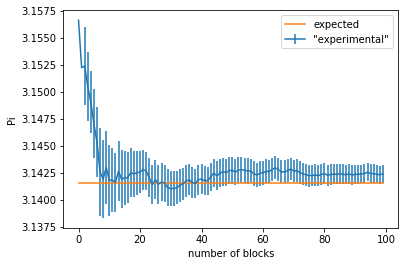

In [12]:
x, PiValue, PiUncert = np.loadtxt("exercices/output/01-3", unpack = True, max_rows = 100)

plt.errorbar(x, PiValue, yerr=PiUncert, label="\"experimental\"")
plt.plot (x, np.ones (x.shape) * np.pi, label="expected")
plt.xlabel ('number of blocks')
plt.ylabel  ('Pi')
plt.legend ()
plt.show()

once more the value computed numerically matches the expected one within the statistical uncertainty